## Banknote Authentication

 Cara 1 Load Dataset:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [ ]:
! kaggle datasets download -d ritesaluja/bank-note-authentication-uci-data

  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 33.6MB/s]


In [ ]:
!unzip bank-note-authentication-uci-data.zip

Archive:  bank-note-authentication-uci-data.zip
  inflating: BankNote_Authentication.csv  


Cara 2 Load Dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

sumber data : https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data
Klasifikasi uang kertas dengan kelas 0 (Uang Palsu) dan kelas 1 (Uang Asli) dengan Algoritma K-NN (K-Nearest Neighbor)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load Data

In [ ]:
#import data
dataset = pd.read_csv('/content/BankNote_Authentication.csv')
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Analisis Data dan Visualisasi Data 

In [ ]:
#menapilkan informasi data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
#memeriksa null value
dataset.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [ ]:
#shape data
dataset.shape

(1372, 5)

In [ ]:
#ukuran data
dataset.size

6860

In [ ]:
#describe data
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
#jumlah data pada masing-masing class
dataset['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

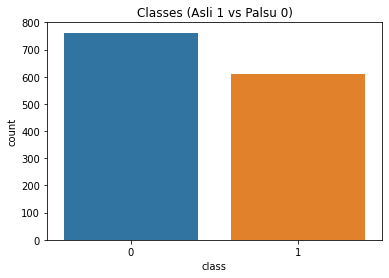

In [ ]:
import seaborn as sns
sns.countplot(x='class',data=dataset)
plt.title('Classes (Asli 1 vs Palsu 0)');

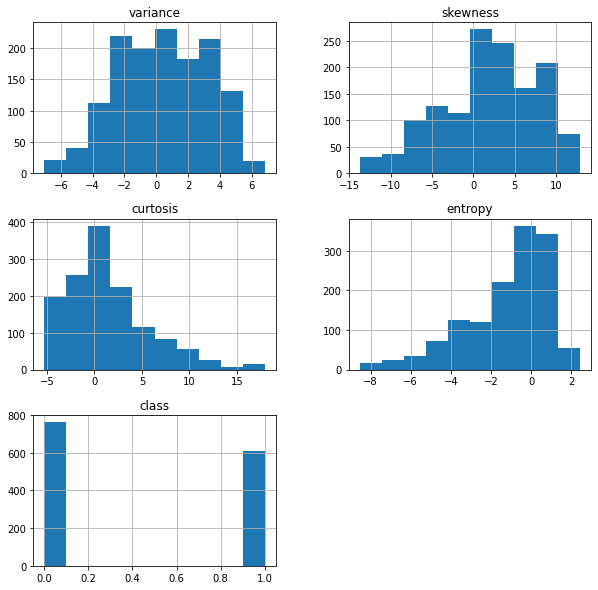

In [ ]:
dataset.hist(figsize = (10,10))
plt.show()

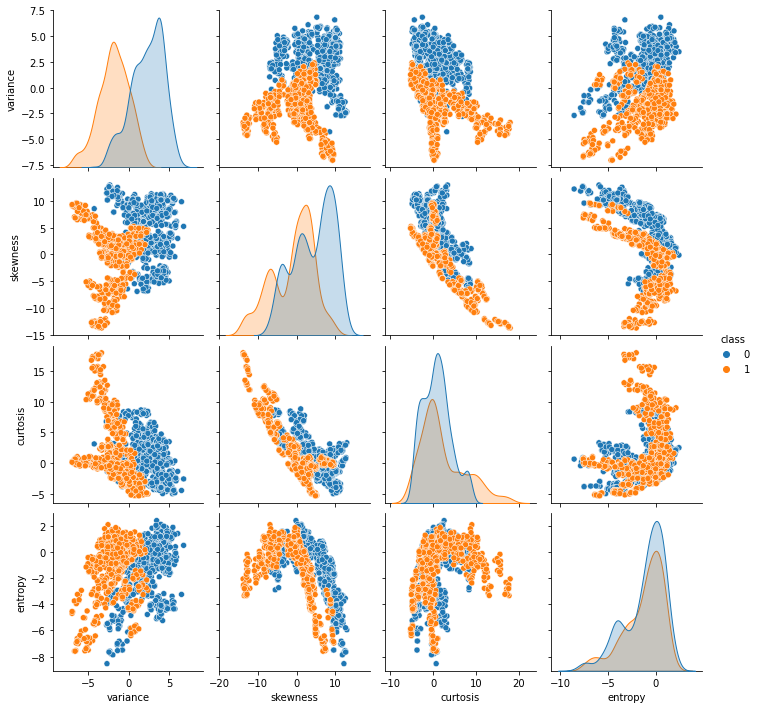

In [ ]:
import seaborn as sns
#hubungan antara fitur dataset
sns.pairplot(dataset,hue='class')

### Feature Set

In [ ]:
dataset.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [ ]:
# Variabel independen "variance, skewness, curtosis, entropy"
X = dataset.drop('class',axis=1).values
X[0:5]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ]])

In [ ]:
# Variabel dependen "class"
y = dataset['class'].values
y[0:5]

array([0, 0, 0, 0, 0])

### Normalize Data

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       [ 1.06374236,  1.29547754, -1.25539712, -1.14402883],
       [-0.03677175, -1.0870383 ,  0.73673042,  0.09658697]])

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1097, 4) (1097,)
Test set: (275, 4) (275,)


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

#### Predicting

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0])

## Evaluasi hasil akurasi

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9981768459434822
Test set Accuracy:  1.0


### Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

Confusion matrix, without normalization
[[158   0]
 [  0 117]]


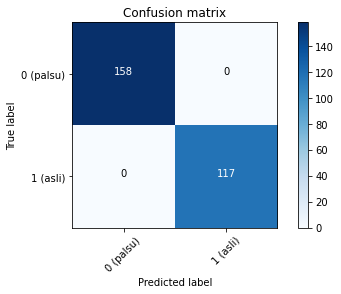

In [ ]:
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0 (palsu)","1 (asli)"], title='Confusion matrix')
plt.show()

### Classification Report 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       117

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,yhat)*100
score

100.0

## Cek akurasi K lainnya

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98545455,
       0.98545455, 0.98545455, 0.98909091, 0.98909091])

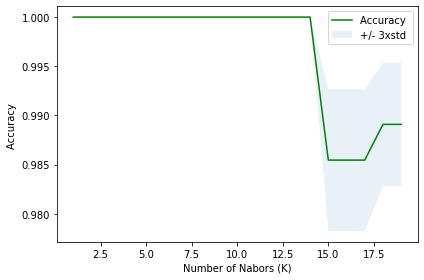

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
params  = {
    'n_estimators' : [100,200,300,400],
}
grid_search = GridSearchCV(rf,params)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
grid_search.best_params_

{'n_estimators': 400}

In [ ]:
grid_search.best_score_

0.9927106683271066

In [ ]:
rforest = RandomForestClassifier(n_estimators=100)
rforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_pred = rforest.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[158   0]
 [  0 117]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       117

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Confusion matrix, without normalization
[[158   0]
 [  0 117]]


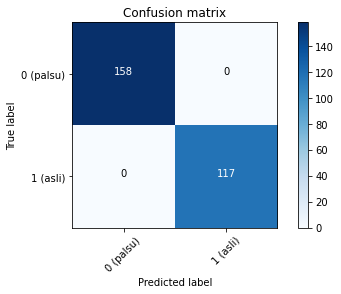

In [ ]:
rf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure()
plot_confusion_matrix(rf_matrix, classes=["0 (palsu)","1 (asli)"], title='Confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,rf_pred) * 100
score

100.0

# CNN

In [ ]:
import tensorflow as tf

from keras.layers import Dropout
model = tf.keras.Sequential()
model.add(Dropout(0.2, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

optimizer = tf.keras.optimizers.Adam()

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics =['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_model = model.fit(X_train, y_train,epochs=40)

Epoch 1/40
35/35 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9298
Epoch 2/40
35/35 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9426
Epoch 3/40
35/35 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.9444
Epoch 4/40
35/35 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9407
Epoch 5/40
35/35 [==============================] - 0s 2ms/step - loss: 0.1564 - accuracy: 0.9280
Epoch 6/40
35/35 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9344
Epoch 7/40
35/35 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.9435
Epoch 8/40
35/35 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9417
Epoch 9/40
35/35 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9435
Epoch 10/40
35/35 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9325
Epoch 11/40
35/35 [

In [ ]:
eval = model.evaluate(X_test, y_test, verbose=0) 
print("\nLoss, accuracy on test data: ")
print("%0.4f %0.2f%%" % (eval[0],eval[1]*100))


Loss, accuracy on test data: 
0.0508 98.18%


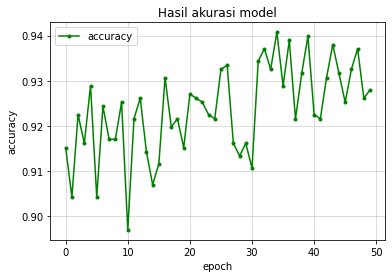

In [ ]:
plt.plot(history_model.history['accuracy'],color='green',marker='.')
plt.title('Hasil akurasi model')
plt.xlabel('epoch')
plt.grid(color='darkgray', linestyle='-',alpha=0.5)
plt.ylabel('accuracy')
plt.legend(['accuracy'])
plt.show()

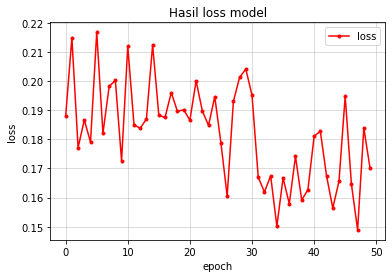

In [ ]:
plt.plot(history_model.history['loss'],color='r',marker='.')
plt.title('Hasil loss model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(color='darkgray', linestyle='-',alpha=0.5)
plt.legend(['loss'])
plt.show()